In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from itertools import product
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [281]:
y_test.value_counts()
455/(455+270)

0.6275862068965518

In [282]:
df= pd.read_csv("/Users/jun-young/Downloads/movie_review-2.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,domestic_distributor,hasDomesticDistributor,...,Avg Max numVotes,Mean Avg numVotes,Avg Total Votes,Sum Total Votes,Total number of movie projects,Avg Movie/TV Ratio,Sum number of total projects,Avg Acting Experience,Sum Good_movies,Previous Genres
0,0,0,tt6264654,Free Guy,2021,115,"Action,Adventure,Comedy",7.2,20th Century Studios,1,...,718297.00,112880.716721,2259411.50,9037646.0,125.0,0.668375,169.0,18.50,76.0,"['Comedy', 'Drama', 'Romance', 'Music', 'Short..."
1,1,1,tt8936646,Extraction,2020,116,"Action,Thriller",6.7,no domestic distributor,0,...,482840.00,142046.884615,3674544.00,7349088.0,32.0,0.668919,39.0,12.50,21.0,"['Crime', 'Thriller', 'Action', 'Adventure', '..."
2,2,2,tt7556122,The Old Guard,2020,125,"Action,Adventure,Fantasy",6.7,no domestic distributor,0,...,354123.25,58129.135922,1246149.00,4984596.0,136.0,0.874871,148.0,17.50,65.0,"['Drama', 'Short', 'Drama', 'Drama', 'Romance'..."
3,3,3,tt0993840,Army of the Dead,2021,148,"Action,Crime,Horror",5.8,no domestic distributor,0,...,523787.50,64343.574889,1770099.75,7080399.0,119.0,0.720560,176.0,18.25,54.0,"['Drama', 'Thriller', 'Action', 'Action', 'Sci..."
4,4,4,tt9620292,Promising Young Woman,2020,113,"Crime,Drama,Mystery",7.5,Focus Features,1,...,408556.50,62320.348193,1267395.75,5069583.0,164.0,0.599994,335.0,19.75,64.0,"['Comedy', 'Drama', 'Comedy', 'Adventure', 'Co..."


In [283]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizor= CountVectorizer()
df["genres"]=df["genres"].str.replace("-","")
genre=vectorizor.fit_transform(df["genres"])
g=pd.DataFrame(genre.toarray(),columns=vectorizor.get_feature_names_out())
df=df.merge(g, left_index=True,right_index=True)


In [284]:
df["Previous Genres"]=df["Previous Genres"].str.replace("[","").replace("]","")
df["Previous Genres"]=df["Previous Genres"].str.replace("-","")
vectorizor1= CountVectorizer()
prev= vectorizor1.fit_transform(df["Previous Genres"])
g1=pd.DataFrame(prev.toarray(),columns=vectorizor1.get_feature_names_out()).add_prefix('Percent_Previous_Genre_')
for i in g1.index: 
    g1.loc[i]=(g1.loc[i]/g1.sum(axis=1)[i])*100
df=df.merge(g1, left_index=True,right_index=True)

In [285]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,domestic_distributor,hasDomesticDistributor,...,Percent_Previous_Genre_none,Percent_Previous_Genre_realitytv,Percent_Previous_Genre_romance,Percent_Previous_Genre_scifi,Percent_Previous_Genre_short,Percent_Previous_Genre_sport,Percent_Previous_Genre_talkshow,Percent_Previous_Genre_thriller,Percent_Previous_Genre_war,Percent_Previous_Genre_western
0,0,0,tt6264654,Free Guy,2021,115,"Action,Adventure,Comedy",7.2,20th Century Studios,1,...,0.000000,0.0,1.886792,3.301887,16.981132,1.415094,0.943396,5.188679,0.471698,0.471698
1,1,1,tt8936646,Extraction,2020,116,"Action,Thriller",6.7,no domestic distributor,0,...,2.564103,0.0,0.000000,6.410256,5.128205,0.000000,0.000000,3.846154,0.000000,0.000000
2,2,2,tt7556122,The Old Guard,2020,125,"Action,Adventure,Fantasy",6.7,no domestic distributor,0,...,0.000000,0.0,9.375000,1.562500,8.854167,0.520833,0.000000,6.770833,0.520833,0.520833
3,3,3,tt0993840,Army of the Dead,2021,148,"Action,Crime,Horror",5.8,no domestic distributor,0,...,0.000000,0.0,3.167421,2.262443,4.977376,5.429864,0.000000,7.239819,0.452489,0.000000
4,4,4,tt9620292,Promising Young Woman,2020,113,"Crime,Drama,Mystery",7.5,Focus Features,1,...,0.000000,0.0,4.803493,2.183406,7.860262,0.436681,0.000000,2.183406,0.436681,0.000000


In [286]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tconst', 'primaryTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'domestic_distributor',
       'hasDomesticDistributor', 'streaming', 'on_streaming', 'Superstars',
       'Alisters', 'Blisters', 'Clisters', 'Dlisters', 'Flisters',
       'Avg Fraction Work with Rating', 'Avg Max Rating', 'Mean Avg Rating',
       'Avg Max numVotes', 'Mean Avg numVotes', 'Avg Total Votes',
       'Sum Total Votes', 'Total number of movie projects',
       'Avg Movie/TV Ratio', 'Sum number of total projects',
       'Avg Acting Experience', 'Sum Good_movies', 'Previous Genres', 'action',
       'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'romance', 'scifi', 'sport', 'thriller', 'war',
       'western', 'Percent_Previous_Genre_action',
       'Percent_Previous_Genre_adventure', 'Percent_Previous_Genre_animation'

In [287]:
df.to_csv('update2.csv')

In [288]:
df_new = df.drop([ 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [289]:
mapping = {'Warner Bros.': 1, 'Twentieth Century Fox': 1, 'United Artists':1, 'Sony Pictures Classics':1,
          'Lionsgate':1, 'Paramount Pictures':1, '20th Century Studios':1, 'Sony Pictures Entertainment (SPE)':1, 
          'United Artists Releasing':1}

df_new = df_new.replace({'domestic_distributor': mapping})

In [290]:
df_new['domestic_distributor'] = np.where(df_new['domestic_distributor'].isin([1]), df['domestic_distributor'], 0)

In [291]:
mapping = {'Warner Bros.': 1, 'Twentieth Century Fox': 1, 'United Artists':1, 'Sony Pictures Classics':1,
          'Lionsgate':1, 'Paramount Pictures':1, '20th Century Studios':1, 'Sony Pictures Entertainment (SPE)':1, 
          'United Artists Releasing':1}

df_new = df_new.replace({'domestic_distributor': mapping})
df_new = df_new.rename({'domestic_distributor': 'major_domestic_distributor'}, axis=1)
df_new.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,major_domestic_distributor,hasDomesticDistributor,streaming,on_streaming,...,Percent_Previous_Genre_none,Percent_Previous_Genre_realitytv,Percent_Previous_Genre_romance,Percent_Previous_Genre_scifi,Percent_Previous_Genre_short,Percent_Previous_Genre_sport,Percent_Previous_Genre_talkshow,Percent_Previous_Genre_thriller,Percent_Previous_Genre_war,Percent_Previous_Genre_western
0,tt6264654,Free Guy,2021,115,"Action,Adventure,Comedy",7.2,1,1,Disney+,1,...,0.000000,0.0,1.886792,3.301887,16.981132,1.415094,0.943396,5.188679,0.471698,0.471698
1,tt8936646,Extraction,2020,116,"Action,Thriller",6.7,0,0,Netflix,1,...,2.564103,0.0,0.000000,6.410256,5.128205,0.000000,0.000000,3.846154,0.000000,0.000000
2,tt7556122,The Old Guard,2020,125,"Action,Adventure,Fantasy",6.7,0,0,Netflix,1,...,0.000000,0.0,9.375000,1.562500,8.854167,0.520833,0.000000,6.770833,0.520833,0.520833
3,tt0993840,Army of the Dead,2021,148,"Action,Crime,Horror",5.8,0,0,Netflix,1,...,0.000000,0.0,3.167421,2.262443,4.977376,5.429864,0.000000,7.239819,0.452489,0.000000
4,tt9620292,Promising Young Woman,2020,113,"Crime,Drama,Mystery",7.5,0,1,No Streaming,0,...,0.000000,0.0,4.803493,2.183406,7.860262,0.436681,0.000000,2.183406,0.436681,0.000000


In [292]:
df_new.columns

Index(['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'major_domestic_distributor', 'hasDomesticDistributor',
       'streaming', 'on_streaming', 'Superstars', 'Alisters', 'Blisters',
       'Clisters', 'Dlisters', 'Flisters', 'Avg Fraction Work with Rating',
       'Avg Max Rating', 'Mean Avg Rating', 'Avg Max numVotes',
       'Mean Avg numVotes', 'Avg Total Votes', 'Sum Total Votes',
       'Total number of movie projects', 'Avg Movie/TV Ratio',
       'Sum number of total projects', 'Avg Acting Experience',
       'Sum Good_movies', 'Previous Genres', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'Percent_Previous_Genre_action', 'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genr

In [293]:
df_new = df_new.dropna(subset = ['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'major_domestic_distributor', 'hasDomesticDistributor',
       'streaming', 'on_streaming', 'Superstars', 'Alisters', 'Blisters',
       'Clisters', 'Dlisters', 'Flisters', 'Avg Fraction Work with Rating',
       'Avg Max Rating', 'Mean Avg Rating', 'Avg Max numVotes',
       'Mean Avg numVotes', 'Avg Total Votes', 'Sum Total Votes',
       'Total number of movie projects', 'Avg Movie/TV Ratio',
       'Sum number of total projects', 'Avg Acting Experience',
       'Sum Good_movies', 'Previous Genres', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'Percent_Previous_Genre_action', 'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genre_biography',
       'Percent_Previous_Genre_comedy', 'Percent_Previous_Genre_crime',
       'Percent_Previous_Genre_documentary', 'Percent_Previous_Genre_drama',
       'Percent_Previous_Genre_family', 'Percent_Previous_Genre_fantasy',
       'Percent_Previous_Genre_history', 'Percent_Previous_Genre_horror',
       'Percent_Previous_Genre_music', 'Percent_Previous_Genre_musical',
       'Percent_Previous_Genre_mystery', 'Percent_Previous_Genre_news',
       'Percent_Previous_Genre_none', 'Percent_Previous_Genre_realitytv',
       'Percent_Previous_Genre_romance', 'Percent_Previous_Genre_scifi',
       'Percent_Previous_Genre_short', 'Percent_Previous_Genre_sport',
       'Percent_Previous_Genre_talkshow', 'Percent_Previous_Genre_thriller',
       'Percent_Previous_Genre_war', 'Percent_Previous_Genre_western'])

In [294]:
!pip install plotly
import plotly.express as px

fig = px.imshow(df_new.corr())
fig.update_layout(width = 700, height = 700)
fig.show()


In [295]:
df_new['Good Rating'] = df_new['averageRating'] > 6
df_new["Good Rating"] = df_new["Good Rating"].astype(int)

In [296]:
df_new.columns

Index(['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'major_domestic_distributor', 'hasDomesticDistributor',
       'streaming', 'on_streaming', 'Superstars', 'Alisters', 'Blisters',
       'Clisters', 'Dlisters', 'Flisters', 'Avg Fraction Work with Rating',
       'Avg Max Rating', 'Mean Avg Rating', 'Avg Max numVotes',
       'Mean Avg numVotes', 'Avg Total Votes', 'Sum Total Votes',
       'Total number of movie projects', 'Avg Movie/TV Ratio',
       'Sum number of total projects', 'Avg Acting Experience',
       'Sum Good_movies', 'Previous Genres', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'Percent_Previous_Genre_action', 'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genr

In [297]:
df_new.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,major_domestic_distributor,hasDomesticDistributor,streaming,on_streaming,...,Percent_Previous_Genre_realitytv,Percent_Previous_Genre_romance,Percent_Previous_Genre_scifi,Percent_Previous_Genre_short,Percent_Previous_Genre_sport,Percent_Previous_Genre_talkshow,Percent_Previous_Genre_thriller,Percent_Previous_Genre_war,Percent_Previous_Genre_western,Good Rating
0,tt6264654,Free Guy,2021,115,"Action,Adventure,Comedy",7.2,1,1,Disney+,1,...,0.0,1.886792,3.301887,16.981132,1.415094,0.943396,5.188679,0.471698,0.471698,1
1,tt8936646,Extraction,2020,116,"Action,Thriller",6.7,0,0,Netflix,1,...,0.0,0.000000,6.410256,5.128205,0.000000,0.000000,3.846154,0.000000,0.000000,1
2,tt7556122,The Old Guard,2020,125,"Action,Adventure,Fantasy",6.7,0,0,Netflix,1,...,0.0,9.375000,1.562500,8.854167,0.520833,0.000000,6.770833,0.520833,0.520833,1
3,tt0993840,Army of the Dead,2021,148,"Action,Crime,Horror",5.8,0,0,Netflix,1,...,0.0,3.167421,2.262443,4.977376,5.429864,0.000000,7.239819,0.452489,0.000000,0
4,tt9620292,Promising Young Woman,2020,113,"Crime,Drama,Mystery",7.5,0,1,No Streaming,0,...,0.0,4.803493,2.183406,7.860262,0.436681,0.000000,2.183406,0.436681,0.000000,1


In [298]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from itertools import product

features = ['startYear', 'runtimeMinutes', 
        'major_domestic_distributor', 'hasDomesticDistributor',
        'on_streaming', 'Superstars', 'Alisters', 'Blisters',
       'Clisters', 'Dlisters', 'Flisters', 'Avg Fraction Work with Rating',
       'Avg Max Rating', 'Mean Avg Rating', 'Avg Max numVotes',
       'Mean Avg numVotes', 'Avg Total Votes', 'Sum Total Votes',
       'Total number of movie projects', 'Avg Movie/TV Ratio',
       'Sum number of total projects', 'Avg Acting Experience',
       'Sum Good_movies',  'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'Percent_Previous_Genre_action', 'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genre_biography',
       'Percent_Previous_Genre_comedy', 'Percent_Previous_Genre_crime',
       'Percent_Previous_Genre_documentary', 'Percent_Previous_Genre_drama',
       'Percent_Previous_Genre_family', 'Percent_Previous_Genre_fantasy',
       'Percent_Previous_Genre_history', 'Percent_Previous_Genre_horror',
       'Percent_Previous_Genre_music', 'Percent_Previous_Genre_musical',
       'Percent_Previous_Genre_mystery', 'Percent_Previous_Genre_news',
       'Percent_Previous_Genre_none', 'Percent_Previous_Genre_realitytv',
       'Percent_Previous_Genre_romance', 'Percent_Previous_Genre_scifi',
       'Percent_Previous_Genre_short', 'Percent_Previous_Genre_sport',
       'Percent_Previous_Genre_talkshow', 'Percent_Previous_Genre_thriller',
       'Percent_Previous_Genre_war', 'Percent_Previous_Genre_western']

sc = StandardScaler()
X = df_new[features]
y = df_new['Good Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1645, 71) (1645,) (549, 71) (549,)


## Logistic Regression (Lasso)

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear')

grid_values = {'C': np.arange(0.1,10,0.1)}
log_cv = GridSearchCV(lr, param_grid = grid_values, scoring = 'accuracy', cv=5, verbose=0)
log_cv.fit(X_train, y_train)
log_cv.best_params_

{'C': 0.2}

In [300]:
abs(log_cv.best_estimator_.coef_)[0]

array([0.12747347, 0.32483622, 0.        , 0.0689902 , 0.04782958,
       0.12336339, 0.01180803, 0.09628642, 0.05691204, 0.10535189,
       0.        , 0.06961143, 0.        , 0.17281227, 0.14385312,
       0.09500766, 0.10174684, 0.        , 0.        , 0.03904885,
       0.23716705, 0.13191962, 0.26487153, 0.22007305, 0.0237103 ,
       0.05458172, 0.        , 0.01125906, 0.01632812, 0.47500289,
       0.17796582, 0.00534286, 0.07259286, 0.01929886, 0.31057008,
       0.15126679, 0.        , 0.05837096, 0.05835106, 0.03410191,
       0.09187963, 0.04167446, 0.23655601, 0.00887678, 0.0477052 ,
       0.18841351, 0.02783965, 0.1360984 , 0.0111134 , 0.11310556,
       0.02925906, 0.12962506, 0.016378  , 0.09469107, 0.03972666,
       0.        , 0.02729987, 0.08639248, 0.        , 0.03895307,
       0.05216246, 0.00730681, 0.08593663, 0.        , 0.        ,
       0.04391026, 0.00594835, 0.04711991, 0.06693544, 0.00362214,
       0.        ])

<BarContainer object of 71 artists>

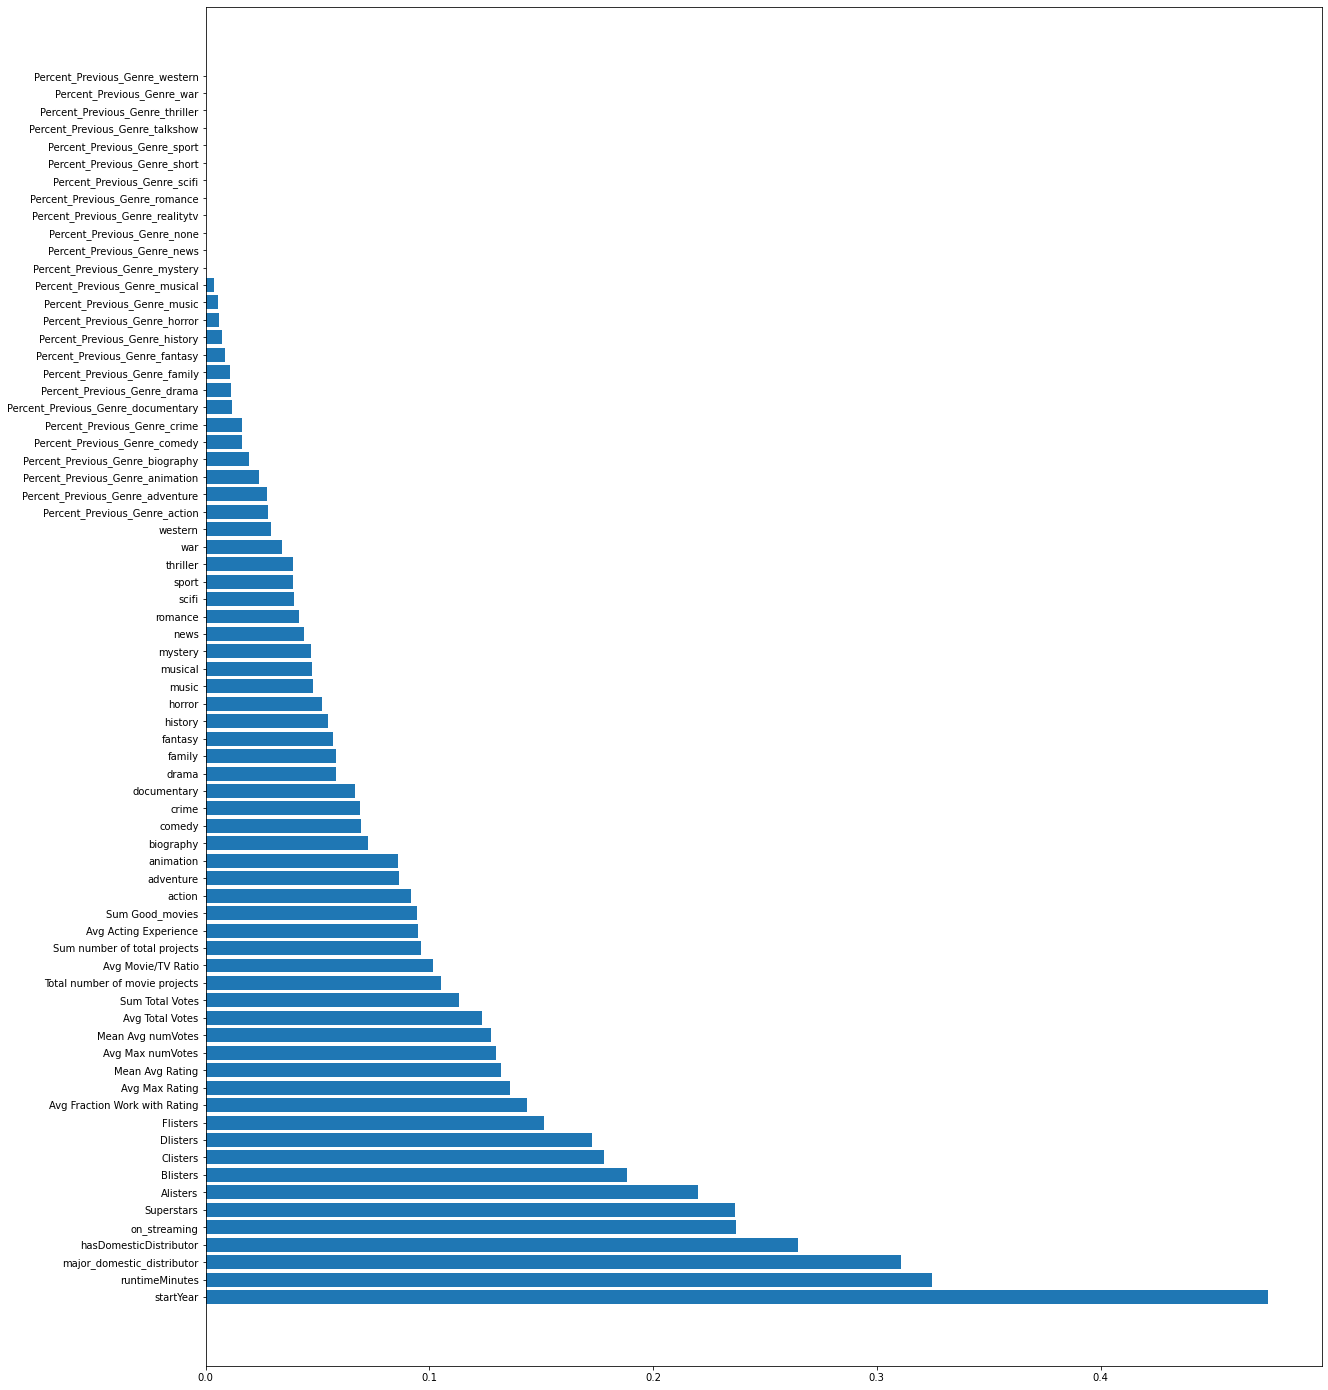

In [301]:
plt.figure(figsize=(20,25))
plt.barh(features, sorted(abs(log_cv.best_estimator_.coef_)[0], reverse=True))

In [302]:
y_pred_logcv = log_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred_logcv)
print(cm)
TPR_logcv = cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])
FPR_logcv = cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])
print(accuracy_score(y_test, y_pred_logcv))
print(TPR_logcv) 
print(FPR_logcv)

[[301  45]
 [125  78]]
0.6903460837887068
0.3842364532019704
0.13005780346820808


## Logistic Regression (no Lasso)

In [398]:
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [399]:
df_new.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,major_domestic_distributor,hasDomesticDistributor,streaming,on_streaming,...,Percent_Previous_Genre_realitytv,Percent_Previous_Genre_romance,Percent_Previous_Genre_scifi,Percent_Previous_Genre_short,Percent_Previous_Genre_sport,Percent_Previous_Genre_talkshow,Percent_Previous_Genre_thriller,Percent_Previous_Genre_war,Percent_Previous_Genre_western,Good Rating
0,tt6264654,Free Guy,2021,115,"Action,Adventure,Comedy",7.2,1,1,Disney+,1,...,0.0,1.886792,3.301887,16.981132,1.415094,0.943396,5.188679,0.471698,0.471698,1
1,tt8936646,Extraction,2020,116,"Action,Thriller",6.7,0,0,Netflix,1,...,0.0,0.000000,6.410256,5.128205,0.000000,0.000000,3.846154,0.000000,0.000000,1
2,tt7556122,The Old Guard,2020,125,"Action,Adventure,Fantasy",6.7,0,0,Netflix,1,...,0.0,9.375000,1.562500,8.854167,0.520833,0.000000,6.770833,0.520833,0.520833,1
3,tt0993840,Army of the Dead,2021,148,"Action,Crime,Horror",5.8,0,0,Netflix,1,...,0.0,3.167421,2.262443,4.977376,5.429864,0.000000,7.239819,0.452489,0.000000,0
4,tt9620292,Promising Young Woman,2020,113,"Crime,Drama,Mystery",7.5,0,1,No Streaming,0,...,0.0,4.803493,2.183406,7.860262,0.436681,0.000000,2.183406,0.436681,0.000000,1


In [400]:
df_features = df_new.drop(['tconst', 'primaryTitle','genres','Good Rating',
                           'streaming','averageRating','Previous Genres'], axis=1)

X = sm.add_constant(df_features)

In [417]:
df_features.columns

Index(['startYear', 'runtimeMinutes', 'major_domestic_distributor',
       'hasDomesticDistributor', 'on_streaming', 'Superstars', 'Alisters',
       'Blisters', 'Clisters', 'Dlisters', 'Flisters',
       'Avg Fraction Work with Rating', 'Avg Max Rating', 'Mean Avg Rating',
       'Avg Max numVotes', 'Mean Avg numVotes', 'Avg Total Votes',
       'Sum Total Votes', 'Total number of movie projects',
       'Avg Movie/TV Ratio', 'Sum number of total projects',
       'Avg Acting Experience', 'Sum Good_movies', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
       'Percent_Previous_Genre_action', 'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genre_biography',
       'Percent_Previous_Genre_comedy', 'Percent_Previous_Genre_crime',
      

In [401]:
logreg = sm.Logit(df_new['Good Rating'], X)

model = logreg.fit()
print(model.summary())

         Current function value: 0.537511
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Good Rating   No. Observations:                 2194
Model:                          Logit   Df Residuals:                     2122
Method:                           MLE   Df Model:                           71
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1813
Time:                        18:41:34   Log-Likelihood:                -1179.3
converged:                      False   LL-Null:                       -1440.5
Covariance Type:            nonrobust   LLR p-value:                 6.118e-70
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.2114   9.41e+06  -2.35e-07      1.000   -1.84e+07    1.

/Users/jun-young/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [421]:
features2=['startYear', 'runtimeMinutes', 'major_domestic_distributor',
       'hasDomesticDistributor', 'on_streaming', 'Superstars', 'Alisters',
       'Blisters', 'Clisters', 'Dlisters', 'Flisters',
       'Avg Fraction Work with Rating', 'Avg Max Rating', 'Mean Avg Rating',
       'Avg Max numVotes', 'Mean Avg numVotes', 'Avg Total Votes',
       'Sum Total Votes', 'Total number of movie projects',
       'Avg Movie/TV Ratio', 'Sum number of total projects',
       'Avg Acting Experience', 'Sum Good_movies', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
#        'Percent_Previous_Genre_action', 
           'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genre_biography',
       'Percent_Previous_Genre_comedy', 'Percent_Previous_Genre_crime',
       'Percent_Previous_Genre_documentary', 'Percent_Previous_Genre_drama',
       'Percent_Previous_Genre_family', 'Percent_Previous_Genre_fantasy',
       'Percent_Previous_Genre_history', 'Percent_Previous_Genre_horror',
       'Percent_Previous_Genre_music', 'Percent_Previous_Genre_musical',
       'Percent_Previous_Genre_mystery', 'Percent_Previous_Genre_news',
       'Percent_Previous_Genre_none', 'Percent_Previous_Genre_realitytv',
       'Percent_Previous_Genre_romance', 'Percent_Previous_Genre_scifi',
       'Percent_Previous_Genre_short', 'Percent_Previous_Genre_sport',
       'Percent_Previous_Genre_talkshow', 'Percent_Previous_Genre_thriller',
       'Percent_Previous_Genre_war', 'Percent_Previous_Genre_western']

A = (VIF(df_new,features2))

for list in A:
    print(list)


1.0521060876865391
1.1586867262610385
1.1947662700643584
1.3067392022211424
1.3440517485772805
6.9550599480174045
5.924719918886147
4.566667130298924
2.5680890081959435
1.95887321279898
2.9659090356003053
1.9221045084946105
2.728245382787697
2.8933749927921366
7.000029183585736
3.0929118617962983
29.145922357430486
38.124802843607895
13.954991414366212
1.8985708991419155
19.064051817104417
2.890123611684345
6.21596478693625
1.3324208855571789
1.2364381351062323
1.5215754777181782
1.1926360047931475
1.4554740854834125
1.122364499236339
1.5434674376765474
1.5194340535315165
1.1744543544589754
1.0552120269754193
1.1611506287851265
1.5227498733127482
1.1173649881110441
1.0624812876303698
1.1053760307624427
1.018697858565953
1.1448857988346783
1.0923015052759963
1.0453639624888615
1.283628524217343
1.111123753749045
1.100197777619737
2.9536407397274913
2.6281276591857465
1.6281461677151345
5.633084788132558
3.254800929875703
1.334931607039089
6.863442987570015
1.6379441736965799
1.426850638

'documentary'

In [425]:
features2[16]

'Avg Total Votes'

In [431]:
#Logreg model without 'Avg Total Votes'
df_features2 = df_new.drop(['tconst', 'primaryTitle','genres','Good Rating',
                           'streaming','averageRating','Previous Genres','Avg Total Votes'], axis=1)

X2 = sm.add_constant(df_features2)

logreg = sm.Logit(df_new['Good Rating'], X2)

model2 = logreg.fit()
print(model2.summary())

         Current function value: 0.539686
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Good Rating   No. Observations:                 2194
Model:                          Logit   Df Residuals:                     2123
Method:                           MLE   Df Model:                           70
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1780
Time:                        19:03:56   Log-Likelihood:                -1184.1
converged:                      False   LL-Null:                       -1440.5
Covariance Type:            nonrobust   LLR p-value:                 1.410e-68
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.2902        nan        nan        nan         nan      

/Users/jun-young/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [432]:
features3=['startYear', 'runtimeMinutes', 'major_domestic_distributor',
       'hasDomesticDistributor', 'on_streaming', 'Superstars', 'Alisters',
       'Blisters', 'Clisters', 'Dlisters', 'Flisters',
       'Avg Fraction Work with Rating', 'Avg Max Rating', 'Mean Avg Rating',
       'Avg Max numVotes', 'Mean Avg numVotes', 
#            'Avg Total Votes',
       'Sum Total Votes', 'Total number of movie projects',
       'Avg Movie/TV Ratio', 'Sum number of total projects',
       'Avg Acting Experience', 'Sum Good_movies', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
#        'Percent_Previous_Genre_action', 
           'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genre_biography',
       'Percent_Previous_Genre_comedy', 'Percent_Previous_Genre_crime',
       'Percent_Previous_Genre_documentary', 'Percent_Previous_Genre_drama',
       'Percent_Previous_Genre_family', 'Percent_Previous_Genre_fantasy',
       'Percent_Previous_Genre_history', 'Percent_Previous_Genre_horror',
       'Percent_Previous_Genre_music', 'Percent_Previous_Genre_musical',
       'Percent_Previous_Genre_mystery', 'Percent_Previous_Genre_news',
       'Percent_Previous_Genre_none', 'Percent_Previous_Genre_realitytv',
       'Percent_Previous_Genre_romance', 'Percent_Previous_Genre_scifi',
       'Percent_Previous_Genre_short', 'Percent_Previous_Genre_sport',
       'Percent_Previous_Genre_talkshow', 'Percent_Previous_Genre_thriller',
       'Percent_Previous_Genre_war', 'Percent_Previous_Genre_western']

A2 = (VIF(df_new,features3))

for list in A2:
    print(list)


1.0516289092456668
1.1586302413893286
1.1945879370238892
1.3066563972699439
1.3428213514376661
6.931744725627658
5.754853237868277
4.134008990872459
2.456298929157755
1.9286398908178692
2.9607046119611686
1.907942094226393
2.7137846294409447
2.867904889763897
6.247841026750771
3.0667603707873092
17.398788133635552
13.90324642984832
1.8933699076746249
18.838104141954386
2.831735848037135
6.153809541030383
1.3320414836458672
1.2364181736171267
1.5210339807354543
1.1895138425151603
1.4547768884170016
1.1216336963464713
1.5287597522031597
1.5193895650234568
1.174319707673362
1.0551619067844635
1.1607789670294766
1.5223963520443773
1.1166127887675588
1.0624603272137092
1.104956429175304
1.0186678726752545
1.144701703218716
1.0923006242933113
1.0452631002554802
1.2830968745164344
1.1105803383521542
1.1001116767774441
2.9478117381220392
2.627306801876523
1.616831599813393
5.632704244844901
3.2525971254999124
1.3345040896544187
6.863062338452287
1.6346656070925603
1.4265371733661831
1.52423155

In [429]:
features3[19]

'Sum number of total projects'

In [433]:
#logreg model without 'sum number of total projects'
df_features3 = df_new.drop(['tconst', 'primaryTitle','genres','Good Rating',
                           'streaming','averageRating','Previous Genres','Avg Total Votes','Sum number of total projects'], axis=1)

X3 = sm.add_constant(df_features3)

logreg = sm.Logit(df_new['Good Rating'], X3)

model3 = logreg.fit()
print(model3.summary())

         Current function value: 0.540155
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Good Rating   No. Observations:                 2194
Model:                          Logit   Df Residuals:                     2124
Method:                           MLE   Df Model:                           69
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1773
Time:                        19:04:10   Log-Likelihood:                -1185.1
converged:                      False   LL-Null:                       -1440.5
Covariance Type:            nonrobust   LLR p-value:                 1.260e-68
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.3051        nan        nan        nan         nan      

/Users/jun-young/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [435]:
features4=['startYear', 'runtimeMinutes', 'major_domestic_distributor',
       'hasDomesticDistributor', 'on_streaming', 'Superstars', 'Alisters',
       'Blisters', 'Clisters', 'Dlisters', 'Flisters',
       'Avg Fraction Work with Rating', 'Avg Max Rating', 'Mean Avg Rating',
       'Avg Max numVotes', 'Mean Avg numVotes', 
#            'Avg Total Votes',
       'Sum Total Votes', 'Total number of movie projects',
       'Avg Movie/TV Ratio', 
#            'Sum number of total projects',
       'Avg Acting Experience', 'Sum Good_movies', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western',
#        'Percent_Previous_Genre_action', 
           'Percent_Previous_Genre_adventure',
       'Percent_Previous_Genre_animation', 'Percent_Previous_Genre_biography',
       'Percent_Previous_Genre_comedy', 'Percent_Previous_Genre_crime',
       'Percent_Previous_Genre_documentary', 'Percent_Previous_Genre_drama',
       'Percent_Previous_Genre_family', 'Percent_Previous_Genre_fantasy',
       'Percent_Previous_Genre_history', 'Percent_Previous_Genre_horror',
       'Percent_Previous_Genre_music', 'Percent_Previous_Genre_musical',
       'Percent_Previous_Genre_mystery', 'Percent_Previous_Genre_news',
       'Percent_Previous_Genre_none', 'Percent_Previous_Genre_realitytv',
       'Percent_Previous_Genre_romance', 'Percent_Previous_Genre_scifi',
       'Percent_Previous_Genre_short', 'Percent_Previous_Genre_sport',
       'Percent_Previous_Genre_talkshow', 'Percent_Previous_Genre_thriller',
       'Percent_Previous_Genre_war', 'Percent_Previous_Genre_western']

A3 = (VIF(df_new,features4))

for list in A3:
    print(list)


1.0511135062192802
1.1554629833789092
1.1937907037505866
1.3044693310953535
1.336251877382231
6.918704843029123
5.749935989156281
4.070674197900297
2.426162332431505
1.9221726202021892
2.951412428009816
1.8893302601375086
2.7002098068844202
2.867030999033289
6.238093142958287
3.056378659435165
17.39617902333118
3.594737306374786
1.5863733311592771
2.604687743716863
5.662866854898517
1.3316672106175154
1.236408420140446
1.5147359424492906
1.18951384087399
1.4539972814027493
1.1215540765794372
1.5220285527038118
1.5183606738789255
1.1715399178634553
1.0546111430292355
1.1605032726089055
1.522263388270353
1.1162726295602312
1.0606061484965819
1.1049037725473823
1.0180080186809617
1.1443137008077278
1.0923000005331178
1.0439307200514327
1.2830847152172855
1.1105330799788489
1.1001114771340466
2.9325788811907456
2.570283660630415
1.6073197274125692
5.595056930171423
3.2323546503689387
1.33419182034468
6.8063928786591426
1.6342076481895589
1.4241971134253157
1.5211570271212045
5.925873258592

In [509]:
len(features4)

68

In [456]:
#Logreg model without 'Sum Total Votes'
df_features4 = df_new.drop(['tconst', 'primaryTitle','genres','Good Rating',
                           'streaming','averageRating','Previous Genres','Avg Total Votes','Sum number of total projects','Sum Total Votes','Percent_Previous_Genre_action'], axis=1)

X4 = sm.add_constant(df_features4)

logreg = sm.Logit(df_new['Good Rating'], X4)

model4 = logreg.fit()
print(model4.summary())

         Current function value: 0.540327
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Good Rating   No. Observations:                 2194
Model:                          Logit   Df Residuals:                     2126
Method:                           MLE   Df Model:                           67
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1770
Time:                        19:28:12   Log-Likelihood:                -1185.5
converged:                      False   LL-Null:                       -1440.5
Covariance Type:            nonrobust   LLR p-value:                 2.286e-69
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               -893.5530    211.136     -4.232      0.000   -1307.372    -4

/Users/jun-young/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [494]:
train, test = train_test_split(df_new, test_size = 0.25, random_state =42)

In [495]:
train.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,major_domestic_distributor,hasDomesticDistributor,streaming,on_streaming,...,Percent_Previous_Genre_realitytv,Percent_Previous_Genre_romance,Percent_Previous_Genre_scifi,Percent_Previous_Genre_short,Percent_Previous_Genre_sport,Percent_Previous_Genre_talkshow,Percent_Previous_Genre_thriller,Percent_Previous_Genre_war,Percent_Previous_Genre_western,Good Rating
1159,tt11869546,Miracle on Christmas,2020,87,"Drama,Family",6.1,0,0,No Streaming,0,...,0.0,6.382979,2.836879,11.347518,2.127660,0.0,2.836879,0.000000,0.709220,1
1691,tt14850172,Asking for It,2021,97,Thriller,7.2,0,0,No Streaming,0,...,0.0,5.263158,3.684211,17.368421,0.000000,0.0,2.105263,0.000000,0.000000,1
436,tt8560172,The Very Excellent Mr. Dundee,2020,88,Comedy,4.9,0,0,No Streaming,0,...,0.0,6.818182,2.272727,20.454545,0.000000,0.0,2.272727,0.000000,0.000000,0
1903,tt14154440,Redemption for Easter,2021,124,Drama,4.6,0,0,No Streaming,0,...,0.0,0.000000,1.886792,35.849057,0.000000,0.0,1.886792,0.000000,0.000000,0
393,tt9585676,Body Brokers,2021,111,"Crime,Drama,Thriller",6.2,0,0,No Streaming,0,...,0.0,3.603604,4.504505,1.801802,0.900901,0.0,12.612613,1.801802,0.900901,1


In [496]:
y_train = train['Good Rating']
train = sm.add_constant(train)
train = train[X4.columns]

In [501]:
logreg = sm.Logit(y_train, train)

model4 = logreg.fit()
print(model4.summary())

         Current function value: 0.532371
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Good Rating   No. Observations:                 1645
Model:                          Logit   Df Residuals:                     1577
Method:                           MLE   Df Model:                           67
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1882
Time:                        19:52:17   Log-Likelihood:                -875.75
converged:                      False   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.478e-50
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               -681.4016    247.604     -2.752      0.006   -1166.697    -1

/Users/jun-young/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [502]:
y_test = test['Good Rating']
test = sm.add_constant(test)
test = test[X4.columns]

In [505]:
a = model4.predict(test)
l = []
for i in a:
    if i >= 0.5:
        l.append(1)
    else:
        l.append(0)

In [506]:
cm = confusion_matrix(y_test, l)
print(cm)
TPR_log_nocv = cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])
FPR_log_nocv = cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])
print(accuracy_score(y_test, l))
print(TPR_log_nocv) 
print(FPR_log_nocv)

[[297  49]
 [120  83]]
0.692167577413479
0.4088669950738916
0.1416184971098266


## Random Forest Classifier

In [182]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=42).fit(X_train, y_train)

In [183]:
rfc.feature_importances_

array([5.86373294e-03, 4.64499499e-02, 3.97636141e-04, 3.16383014e-03,
       3.35280345e-03, 9.50708500e-04, 2.87693046e-03, 6.58825815e-03,
       7.64219460e-03, 7.56173361e-03, 9.13751458e-03, 2.99503761e-02,
       2.59207777e-02, 4.44467336e-02, 2.45742815e-02, 2.78840821e-02,
       2.46027533e-02, 2.48235225e-02, 2.66201036e-02, 2.83746552e-02,
       2.38216257e-02, 2.65490190e-02, 2.22060902e-02, 4.38116591e-03,
       1.61307139e-03, 1.33208068e-03, 1.45012208e-03, 3.88896192e-03,
       2.73001357e-03, 2.33463185e-02, 1.35474566e-02, 1.49540839e-03,
       1.75802825e-03, 9.04296183e-04, 1.23944166e-02, 3.59711090e-03,
       8.00099052e-04, 1.88135926e-03, 7.98657058e-05, 2.57019866e-03,
       1.74455755e-03, 5.08552841e-04, 1.27407237e-02, 5.30219309e-04,
       5.44263921e-04, 2.85164400e-02, 2.35019572e-02, 2.21572868e-02,
       1.80636272e-02, 2.97332593e-02, 2.34790775e-02, 1.30317844e-02,
       3.04369499e-02, 2.31832286e-02, 2.00859508e-02, 1.48445638e-02,
      

<BarContainer object of 71 artists>

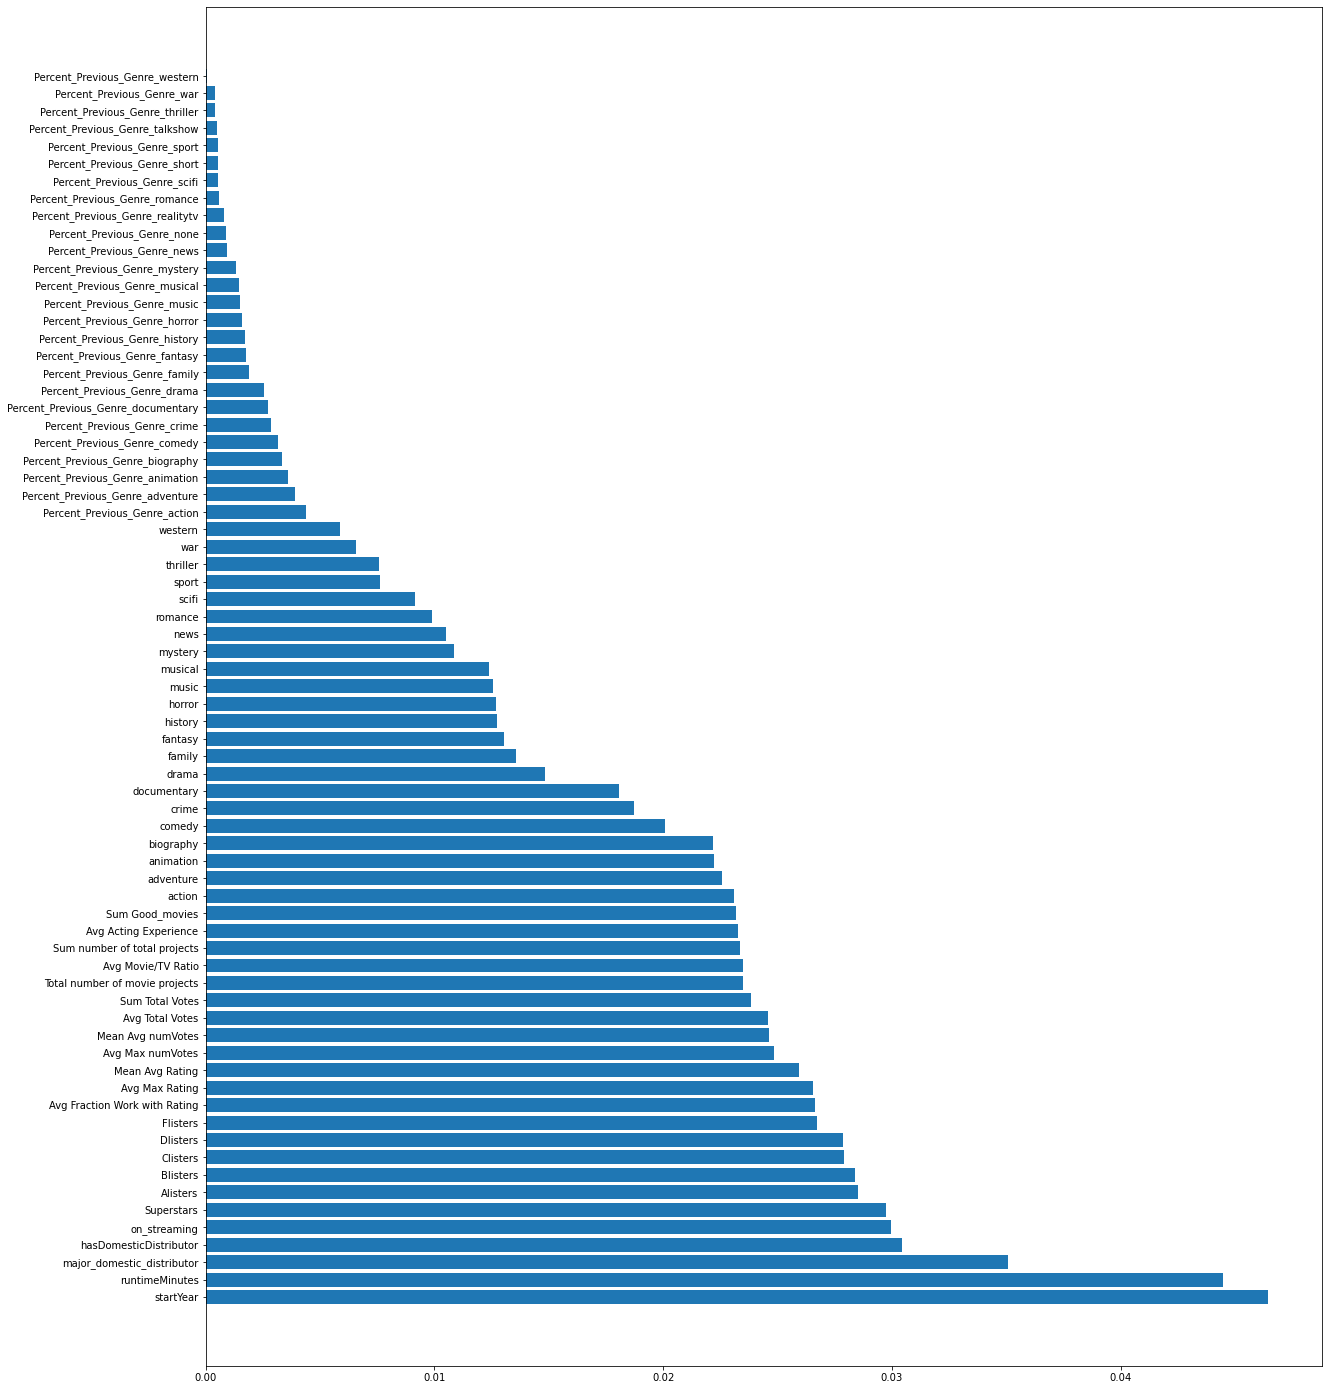

In [184]:
plt.figure(figsize=(20,25))
plt.barh(features, sorted(rfc.feature_importances_, reverse=True))

In [256]:
y_pred_rfc = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)
TPR_rfc = cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])
FPR_rfc = cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])
print(accuracy_score(y_test, y_pred_rfc))
print(TPR_rfc) 
print(FPR_rfc)

[[303  43]
 [148  55]]
0.6520947176684881
0.270935960591133
0.12427745664739884


# Gradient Boosting Classifier

In [187]:
kf = KFold(n_splits=5,shuffle=True, random_state=88)
kfold_index = [] 
for index in kf.split(X_train):
    kfold_index.append(index)
# Each element of kfold_index is in the form of (kfold_index, kfold_index)

In [188]:
n_estimators = np.linspace(500, 75*500, 75, dtype='int32')
max_leaf_nodes = np.linspace(2, 10, 9, dtype='int32')  

In [189]:
R2_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
R2_array[:]=np.nan
RMSE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
RMSE_array[:]=np.nan
MAE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
MAE_array[:]=np.nan
print(R2_array.shape)

(75, 9)


In [190]:
gbc = GradientBoostingClassifier(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3113           26.81s
         2           1.3111           24.19s
         3           1.3110           26.82s
         4           1.3108           25.87s
         5           1.3106           26.43s
         6           1.3104           25.76s
         7           1.3102           25.12s
         8           1.3100           24.72s
         9           1.3098           24.08s
        10           1.3096           23.52s
        20           1.3078           20.92s
        30           1.3060           20.20s
        40           1.3042           19.70s
        50           1.3025           19.37s
        60           1.3008           19.21s
        70           1.2991           19.09s
        80           1.2975           18.90s
        90           1.2959           18.69s
       100           1.2943           18.49s
       200           1.2798           17.62s
       300           1.2670           16.41s
       40

GradientBoostingClassifier(learning_rate=0.001, max_depth=10, max_leaf_nodes=3,
                           min_samples_leaf=10, n_estimators=2000,
                           random_state=88, verbose=1)

In [269]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc)
print(cm)
TPR_gbc = cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])
FPR_gbc = cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])
print(accuracy_score(y_test, y_pred_gbc))
print(TPR_gbc) 
print(FPR_gbc)

[[334  12]
 [165  38]]
0.6775956284153005
0.18719211822660098
0.03468208092485549


# Decision Tree Classifier

In [195]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}
dtc = DecisionTreeClassifier()
cv = KFold(n_splits=5, random_state=5, shuffle=True)
dtc_cv = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=0)
dtc_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scor

In [196]:
y_pred_dtc = dtc_cv.predict(X_test)

In [270]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtc))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dtc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtc)))
print('OSR2:', round(OSR2(dtc_cv, X_test, y_test, y_train), 5))
score = dtc_cv.score(X_train, y_train)
print("R-squared:", score) 
cm = confusion_matrix(y_test, y_pred_dtc)
print(cm)
TPR_dtc = cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])
FPR_dtc = cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])
print(accuracy_score(y_test, y_pred_dtc))
print(TPR_dtc) 
print(FPR_dtc)

Mean Absolute Error: 0.3406193078324226
Mean Squared Error: 0.3406193078324226
Root Mean Squared Error: 0.5836259999626667
OSR2: -0.46145
R-squared: 0.6996960486322188
[[311  35]
 [152  51]]
0.6593806921675774
0.2512315270935961
0.10115606936416185


In [508]:
summary_df = pd.DataFrame({'Logistic Regression (Lasso)' : [accuracy_score(y_test, y_pred_logcv), TPR_logcv, FPR_logcv],                    
                   'Logistic Regression (no Lasso)' : [accuracy_score(y_test, l), TPR_log_nocv, FPR_log_nocv],
                   'Random Forest Classifier (no CV)' : [accuracy_score(y_test, y_pred_rfc),TPR_rfc, FPR_rfc],
                   'Gradient Boosting Classifier (CV)' :[accuracy_score(y_test, y_pred_gbc),TPR_gbc, FPR_gbc],
                  'Decision Tree Classifier (CV)':[accuracy_score(y_test, y_pred_dtc), TPR_dtc, FPR_dtc]})
                                           
summary_df.index = ['ACC','TPR','FPR']
summary_df

,Logistic Regression (Lasso),Logistic Regression (no Lasso),Random Forest Classifier (no CV),Gradient Boosting Classifier (CV),Decision Tree Classifier (CV)
ACC,0.690346,0.692168,0.652095,0.677596,0.659381
TPR,0.384236,0.408867,0.270936,0.187192,0.251232
FPR,0.130058,0.141618,0.124277,0.034682,0.101156
